<a href="https://colab.research.google.com/github/LemosHenri/DinamicaTumoral_SCML/blob/main/MetodosClassicos/Murray_Mol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install numpy matplotlib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp

In [ ]:
# PARÂMETROS DO MODELO
d = 0.0039
p = 0.0445

# PARÂMETROS
l = 20
tf = 80

# DOMÍNIO
size = 100
x = np.linspace(0, 1, size)
t = np.linspace(0, tf * p, tf)

solution = np.zeros((tf, size))
solution[0] = l**3 * np.exp(-100 * (x)**2)

dl = d / (p * l**2)
dx = x[1]
dt = t[1]

def murray_mol(t, u):

    du = np.zeros_like(u)
    du[0] = (dl / dx**2) * (-3 * u[0] + 4 * u[1] - u[2]) +  u[0]
    du[-1] = (dl / dx**2) * (3 * u[-1] - 4 * u[-2] + u[-3]) +  u[-1]

    for j in range(1, size-1): du[j] = (dl / dx**2) * (u[j-1] + u[j+1] - 2*u[j]) +  u[j]

    return du

sol = solve_ivp(murray_mol, [0, tf*p], solution[0], t_eval=np.linspace(0, tf*p, tf))

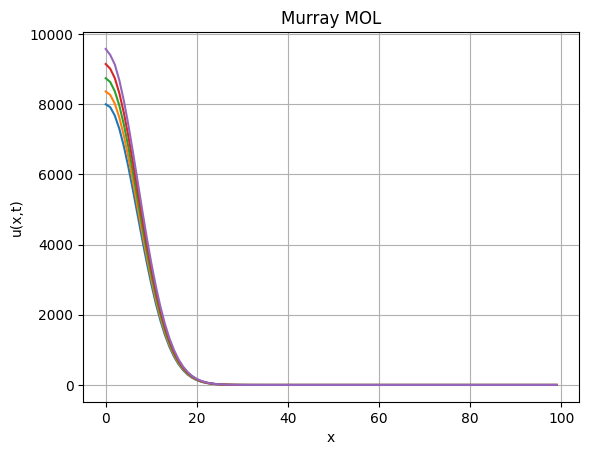

In [ ]:
for i in range(5):
    plt.plot(sol.y[:,i])

plt.title('Murray MOL')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.grid()
plt.show()

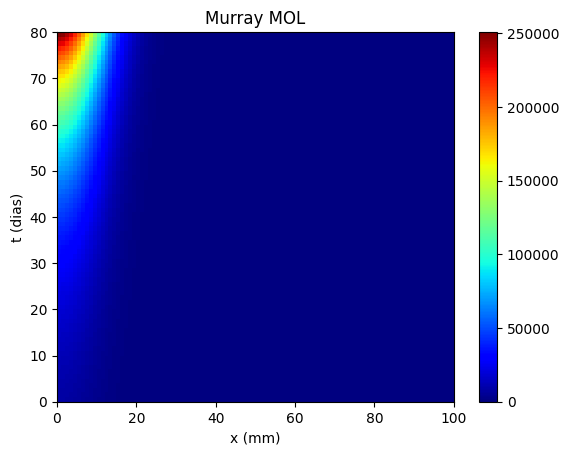

In [ ]:
plt.pcolormesh(sol.y.T, cmap='jet')

plt.title('Murray MOL')
plt.xlabel('x (mm)')
plt.ylabel('t (dias)')
plt.colorbar()
plt.show()